In [1]:
import pandas as pd     ## import the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\rock\Gen Ai\data.xlsx - Sheet1.csv")    ## load the dataset

In [3]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
data.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000.0,2/1/13 0:00,present,senior systems engineer,Chennai,f,2/26/91 0:00,70.60,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [5]:
data.shape

(3998, 39)

In [6]:
data.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

In [7]:
data["DOJ"] = data["DOJ"].str.split().str[0]    # strip any time information
data["DOJ"] = pd.to_datetime(data["DOJ"],
format="%m/%d/%y").dt.strftime("%Y-%m-%d")

In [8]:
data["DOJ"]

0       2012-06-01
1       2013-09-01
2       2014-06-01
3       2011-07-01
4       2014-03-01
           ...    
3993    2011-10-01
3994    2013-07-01
3995    2013-07-01
3996    2014-07-01
3997    2013-02-01
Name: DOJ, Length: 3998, dtype: object

In [9]:
data["DOB"] = data["DOB"].str.split().str[0]
data["DOB"] = pd.to_datetime(data["DOB"],
format="%m/%d/%y").dt.strftime("%Y-%m-%d")
data["DOB"]

0       1990-02-19
1       1989-10-04
2       1992-08-03
3       1989-12-05
4       1991-02-27
           ...    
3993    1987-04-15
3994    1992-08-27
3995    1991-07-03
3996    1992-03-20
3997    1991-02-26
Name: DOB, Length: 3998, dtype: object

In [10]:
data.duplicated

<bound method DataFrame.duplicated of      Unnamed: 0      ID     Salary         DOJ           DOL  \
0         train  203097   420000.0  2012-06-01       present   
1         train  579905   500000.0  2013-09-01       present   
2         train  810601   325000.0  2014-06-01       present   
3         train  267447  1100000.0  2011-07-01       present   
4         train  343523   200000.0  2014-03-01   3/1/15 0:00   
...         ...     ...        ...         ...           ...   
3993      train   47916   280000.0  2011-10-01  10/1/12 0:00   
3994      train  752781   100000.0  2013-07-01   7/1/13 0:00   
3995      train  355888   320000.0  2013-07-01       present   
3996      train  947111   200000.0  2014-07-01   1/1/15 0:00   
3997      train  324966   400000.0  2013-02-01       present   

                      Designation           JobCity Gender         DOB  \
0         senior quality engineer         Bangalore      f  1990-02-19   
1               assistant manager            

In [11]:
data.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [12]:
## Univariate Analysis

In [13]:
#non-vizualization

In [14]:
unique_comb = data[["Designation","JobCity","Gender","10board"]].drop_duplicates()

In [15]:
unique_comb

,Designation,JobCity,Gender,10board
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap"
1,assistant manager,Indore,m,cbse
2,systems engineer,Chennai,f,cbse
3,senior software engineer,Gurgaon,m,cbse
4,get,Manesar,m,cbse
...,...,...,...,...
3993,software engineer,New Delhi,m,cbse
3994,technical writer,Hyderabad,f,state board
3995,associate software engineer,Bangalore,m,"bse,odisha"
3996,software developer,Asifabadbanglore,f,state board


In [16]:
unique_comb.nunique()

Designation    419
JobCity        339
Gender           2
10board        275
dtype: int64

In [17]:
data["Designation"].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [18]:
data["JobCity"].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [19]:
data["Gender"].unique()

array(['f', 'm'], dtype=object)

In [20]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [21]:
data['10percentage'].mean()

77.9254427213607

In [22]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [23]:
data[['ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg',]] = data[['ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg',]].replace(-1,0)

In [24]:
data[['ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg',]]

,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
3993,0,0,0,0,0
3994,0,0,0,0,0
3995,0,0,0,0,0
3996,438,0,0,0,0


In [25]:
data["JobCity"] = data["JobCity"].str.lower()
data["Designation"] = data["Designation"].str.lower
data["10board"] = data["10board"].str.lower()


In [26]:
data["JobCity"].nunique()

262

In [27]:
data["Designation"].nunique()

1

In [28]:
data["10board"].nunique()

275

In [29]:
#Visualition

In [30]:
data["10percentage"].dtype

dtype('float64')

In [31]:
data.head(2)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,2012-06-01,present,<bound method StringMethods.lower of <pandas.c...,bangalore,f,1990-02-19,84.3,...,0,0,0,0,0,0.9737,0.8128,0.5269,1.3549,-0.4455
1,train,579905,500000.0,2013-09-01,present,<bound method StringMethods.lower of <pandas.c...,indore,m,1989-10-04,85.4,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.1076,0.8637


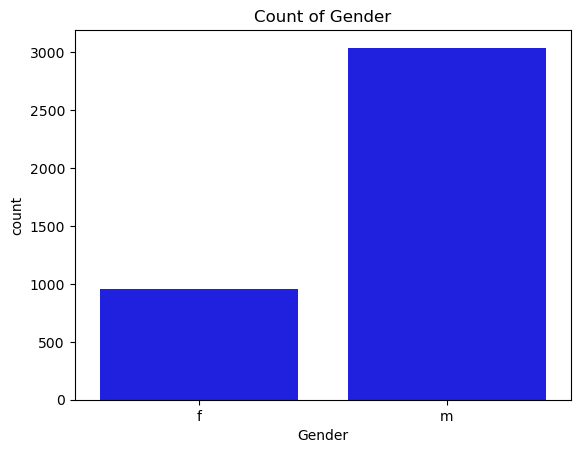

In [32]:

sns.countplot(x="Gender",data=data,color= "blue")
plt.title("Count of Gender")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()


Text(0, 0.5, 'Frequency')

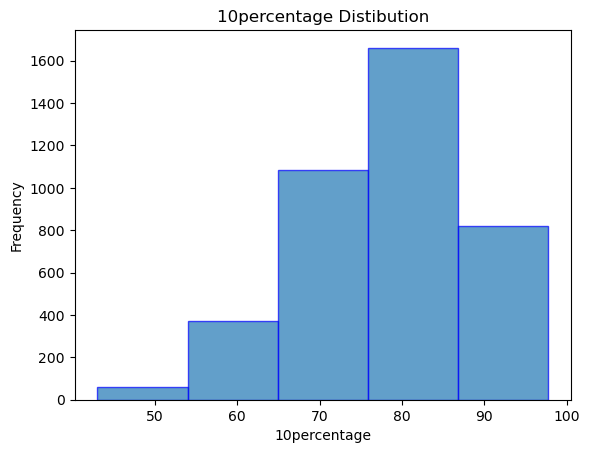

In [33]:
plt.hist(data["10percentage"], bins=5 ,edgecolor = "b" , alpha=0.7)
plt.title("10percentage Distibution")
plt.xlabel("10percentage")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

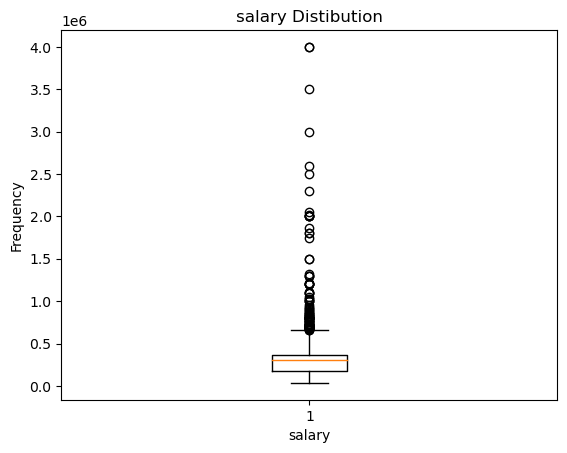

In [34]:
plt.boxplot(data["Salary"])
plt.title("salary Distibution")
plt.xlabel("salary")
plt.ylabel("Frequency")

In [35]:
data.loc[(data.Salary>1000000),['JobCity','Salary']]

,JobCity,Salary
3,gurgaon,1100000.0
92,hyderabad,1500000.0
123,maharajganj,1200000.0
166,mumbai,1860000.0
383,bangalore,1110000.0
394,bangalore,1200000.0
500,-1,2600000.0
725,bangalore,1025000.0
771,angul,1300000.0
779,pune,3500000.0


In [37]:
data.loc[(data.CollegeTier == 1),['10board']].value_counts()

10board                                        
cbse                                               190
state board                                         38
icse                                                26
0                                                   18
up board                                             8
rbse                                                 3
hbse                                                 2
pseb                                                 2
mp                                                   1
ssc                                                  1
maharashtra state board for ssc                      1
maharashtra state board mumbai divisional board      1
board of school education haryana                    1
maharashtra state board                              1
gseb                                                 1
central board of secondary education                 1
bseb,patna                                           1
uttar pradesh    

## Bivariate Analysis

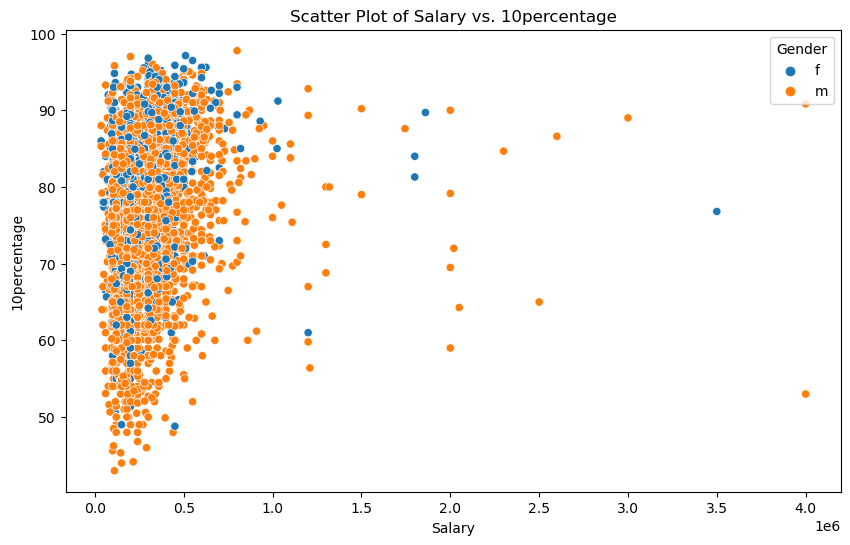

In [39]:
# Scatter plot example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='10percentage', data=data, hue='Gender')
plt.title('Scatter Plot of Salary vs. 10percentage')
plt.xlabel('Salary')
plt.ylabel('10percentage')
plt.show()


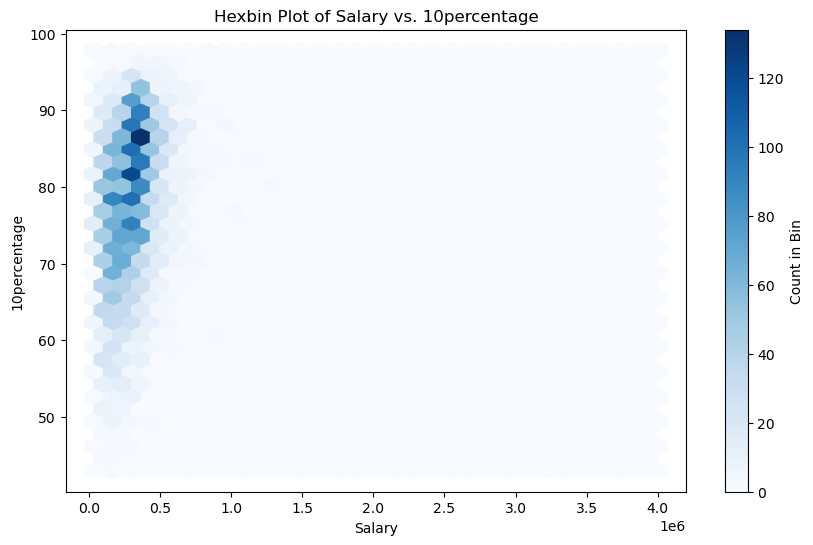

In [41]:
#Herbin Plots
plt.figure(figsize=(10, 6))
plt.hexbin(data['Salary'], data['10percentage'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Salary vs. 10percentage')
plt.xlabel('Salary')
plt.ylabel('10percentage')
plt.show()

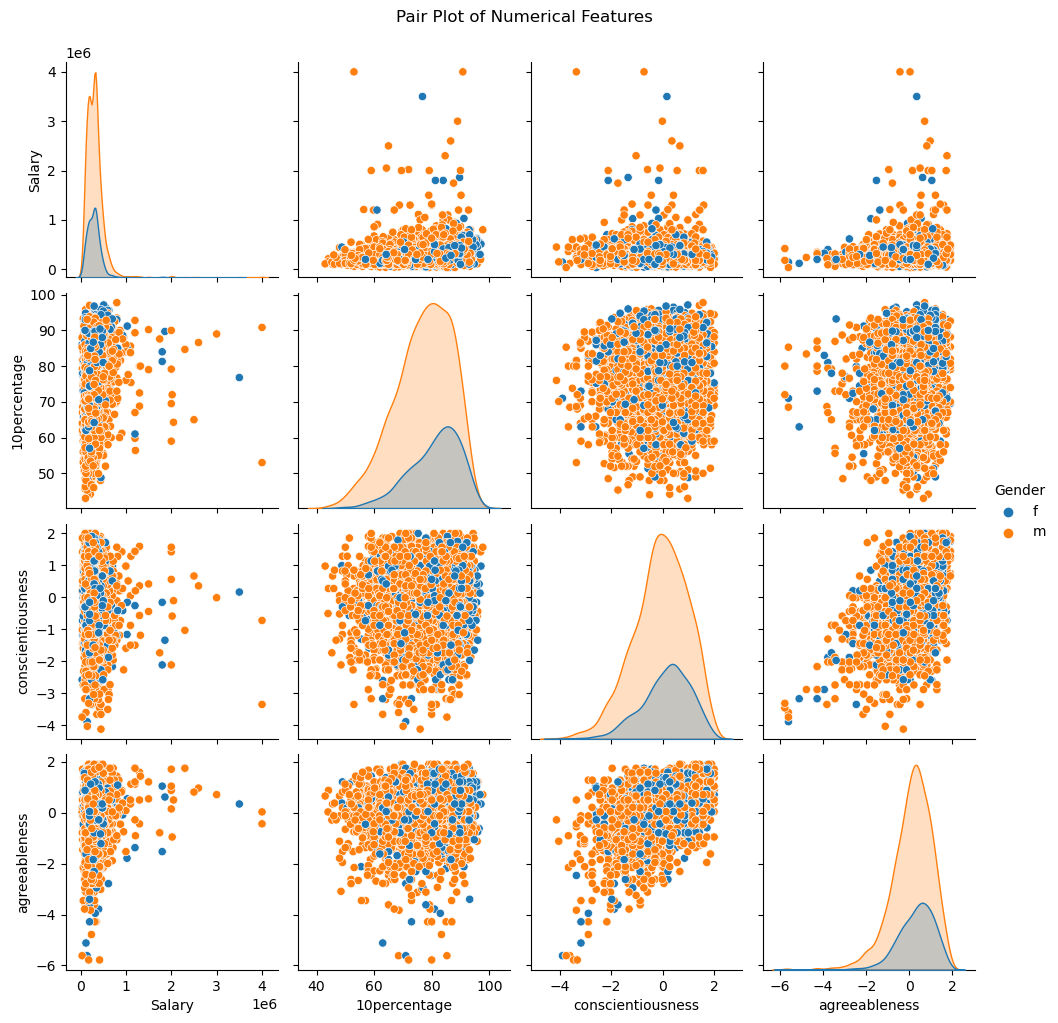

In [42]:
# pair plot
sns.pairplot(data, vars=['Salary', '10percentage', 'conscientiousness', 'agreeableness'], hue='Gender')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


In [43]:
#### Correlation Matrix with Heatmap

In [52]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

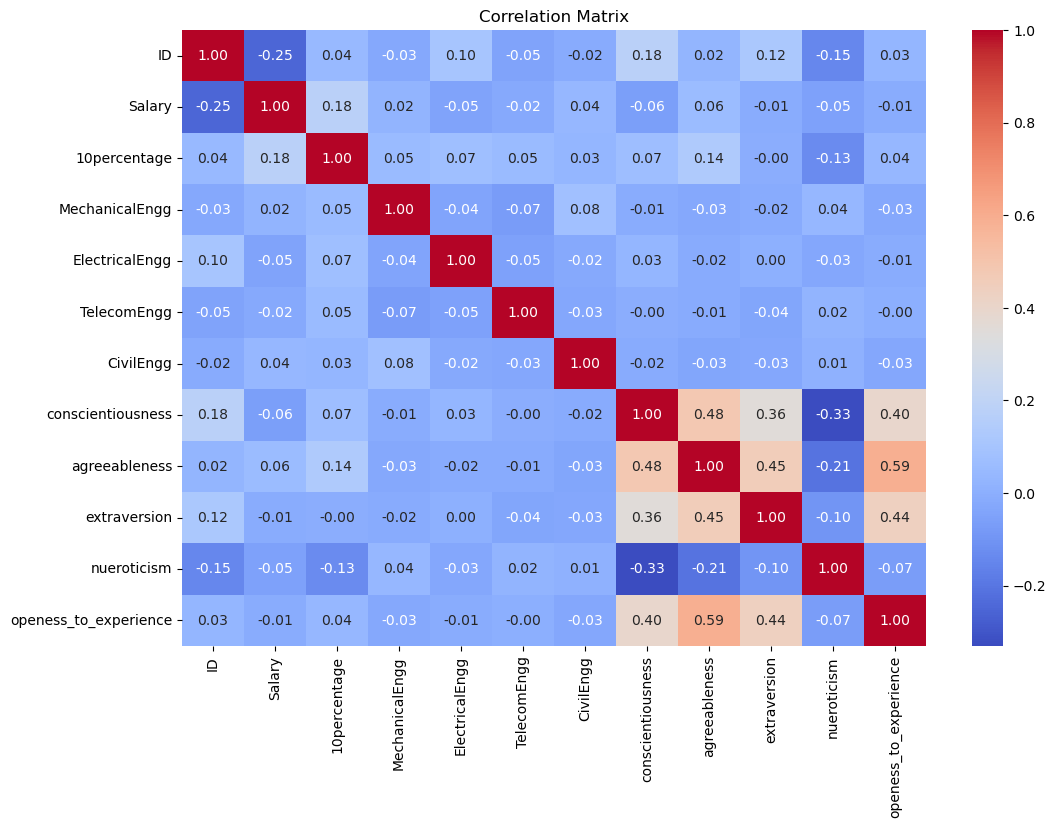

In [55]:
numerical_columns=['ID','Salary','10percentage','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness', 'agreeableness', 'extraversion',
'nueroticism', 'openess_to_experience']

correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
## Box Plot

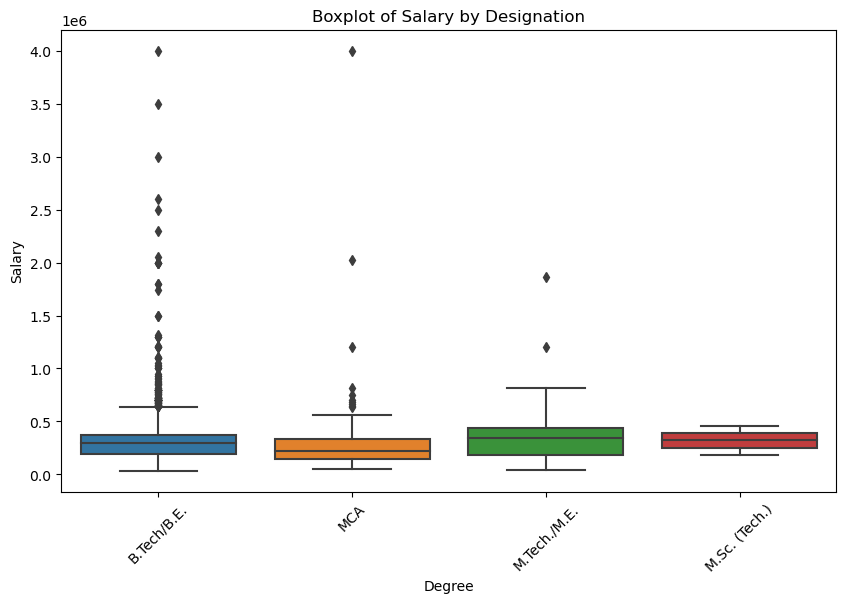

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree', y='Salary', data=data)
plt.title('Boxplot of Salary by Designation')
plt.xticks(rotation=45)
plt.ylabel('Salary')
plt.show()


In [59]:
contingency_table = pd.crosstab(data['Designation'], data['Gender'])

# Display the contingency table
print(contingency_table)

Gender                                                f     m
Designation                                                  
<bound method StringMethods.lower of <pandas.co...  957  3041


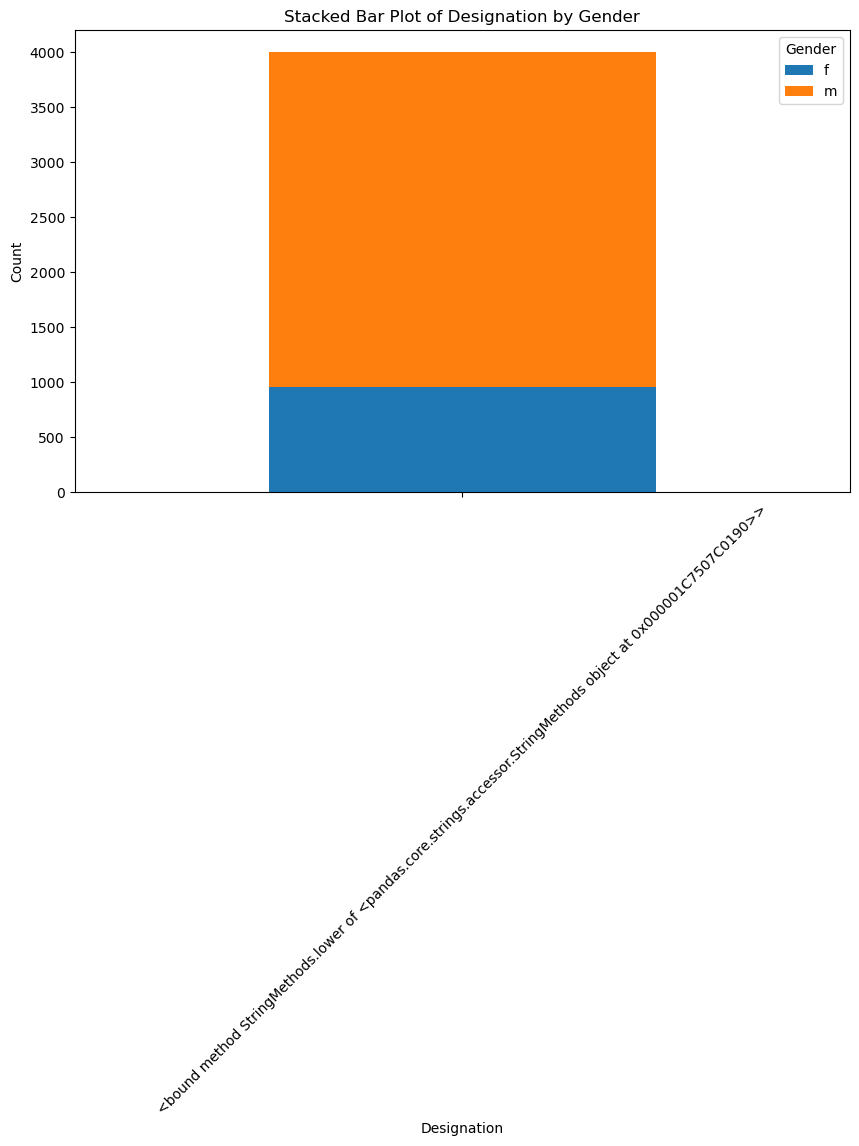

In [62]:
# Stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Designation by Gender')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


In [ ]:
## Research Question 

In [ ]:
# we can break them down into two parts: testing the salary claim related to Computer Science Engineering jobs and analyzing the relationship between gender and specialization.

In [64]:
#### 1.Testing the Salary Claim for Computer Science Graduates

In [66]:
# Filter the relevant job titles
roles_of_interest = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
filtered_df = data[data['Designation'].isin(roles_of_interest)]

# Calculate the average salary
average_salary = filtered_df['Salary'].mean()
salary_range = (250000, 300000)

# Print the average salary and check if it falls within the range
print(f'Average Salary: {average_salary}')
if salary_range[0] <= average_salary <= salary_range[1]:
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")


Average Salary: nan
The claim is not supported by the data.


In [67]:
# Based on the calculated averge salary , you can conclude whether it supports 

In [68]:
## 2. Analyzing the Relationship Between Gender and Specialization

Specialization  aeronautical engineering  \
Gender                                     
f                                      1   
m                                      2   

Specialization  applied electronics and instrumentation  \
Gender                                                    
f                                                     2   
m                                                     7   

Specialization  automobile/automotive engineering  biomedical engineering  \
Gender                                                                      
f                                               0                       2   
m                                               5                       0   

Specialization  biotechnology  ceramic engineering  chemical engineering  \
Gender                                                                     
f                           9                    0                     1   
m                           6                    

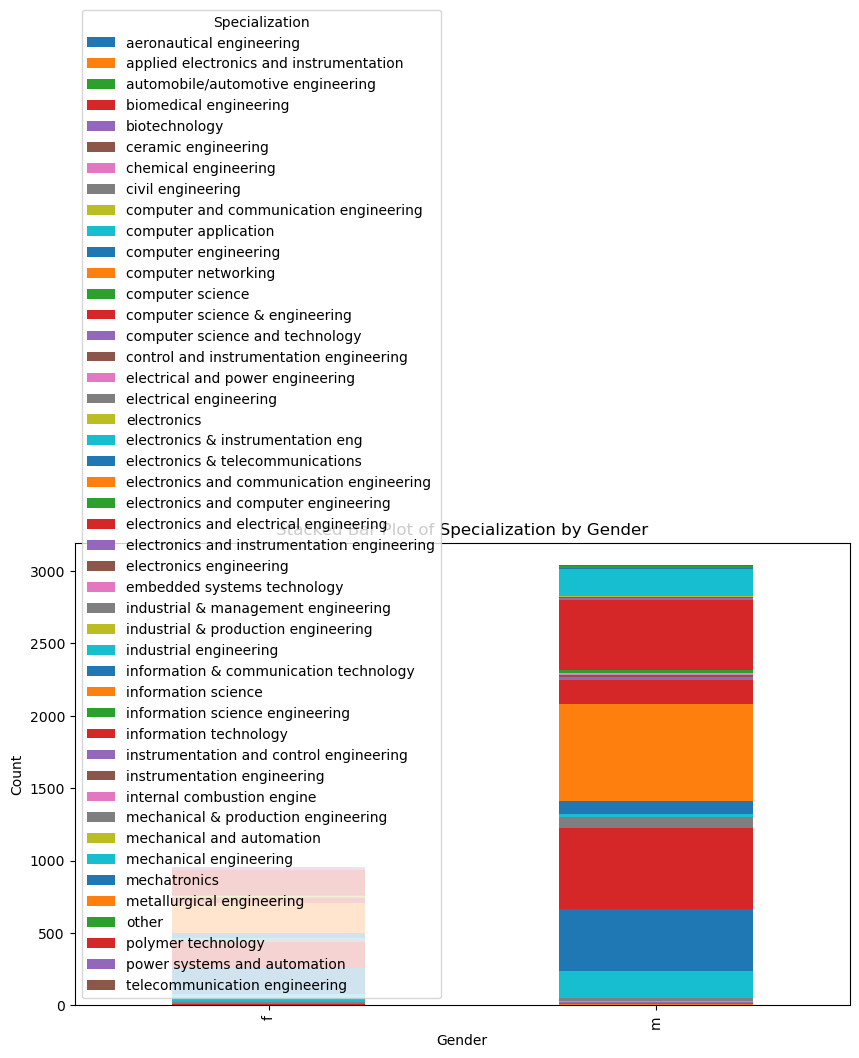

In [69]:
# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

# Display the contingency table
print(contingency_table)

# Plot the stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Specialization by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Specialization')
plt.show()

In [70]:
##  Distribution patterns ; look like a stacked bar plot 

In [ ]:
##The analysis provide a clearer picture of the job market for Computer Science graduates, helping students make informed career choices.